# 15 - Model Evaluation

- Confusion Matrix. Has 
    - Correct Class on the Y/LHS, 
    - Predicted Class on the X/top


| --------       | Negative Predict | Positive Predict |  SUM   |
| Negative Class |  TN              | FP               |   N    |
| Positive Class |  FN              | TP               |   P    |
| Sum            | PN                | PP              | -----  |

*Note, the wikipedia flips the positive and negative for both*: https://en.wikipedia.org/wiki/Precision_and_recall

- Precision: How many of the "yes" are actually yes
    - Sum of the RHS column with bottom right on RHS as numerator
    - = TP /(TP + FP)
- Recall: How many of the true "yes" are you actually finding?
    - TP/(TP + FN) = TP/P
    - aka *Sensitivity* aka *True Positive Rate*
    - Sum of the bottom row with bottom right on RHS as numerator
- *F1 Score*: The harmonic mean of precision and recall
    - 2 TP/(2 TP + FP + FN)
    - Optimizing this is a balance between precision and recall with favoring getting them both large.
    - It actually makes a lot of sense to use this harmonic mean, since the harmonic mean will be closer to the smaller of them. Rather than the mean of them, which could have one very bad and one very good and look OK.
- False Positive Rate aka fall-out *aka* type 1 error *aka* probability of false alarm *aka* 1-Specificity
    - FP/(TN + FP) = FP/N = *all the top row.*
    - *Closest to Recall, which is all the bottom row*
    - Upper Right divided by bottom Row


Common figures to plot:
1. Precision-Recall Curve:
    - Precision on the Y-axis = TP/(TP + FP) = *Probability( Positive | Positive ID)*
    - Recall on the x-axis = TP/P = TP/(TP + FN) = *Probability(Positive ID| Positive)*
    - Really focuses on how well you identify the positive case out of all positives and how 
    - *To get precision = 1:*
        - This means FP = 0
        - So be very cautious about marking as positive. Set a high threshold
        - this errs on the side of overdoing negatives.
    - *To get recall = 1:*
        - This means FN = 0
        - So be very cautious as marking negative! Set a low threshold for marking '1'
        - This errs on the side of overdoing positives
        - When Recall is 1, precision will be whatever fraction of the data actually is positive case
        - **This is the only one that doesn't go to zero
        - Perfect classifier should stay at top then drop to fraction of 'Yes/Positiv' case in the data at 1 for recall
    - **You can train any model to emphasize either precision (more careful about "Yes"/Positive case) or more careful about "No"/Negative Case.

2. ROC (Receiver Operator Curve)
    - Includes TN, which isn't included on the above. 
    - Less focus on the positive case. Just correct classification
    - Recall = True Positive Rate = TP/P = TP/(FN + TP) on the Y-axis = P(Positive Identity| Positive )
    - False Positive Rate = FP/N = FP/(FP+TN) On the X-axis = P(Positive Identity | Negative)
    - To get perfect Recall, 
    - Shows FP and TP rate growing together
    - Perfect classifier is a vertical line at 0 FPR up to 1 recall and stays at 1 all the way across.


**Ways 1 and 2 the same**
- Both have recall
    - its just on the x-axis in precision-recall
    - its on the y-a-xis in ROC 
- both are parametric functions of the way you threshold

*Ways 1 and 2 Different*
- Precision Recall shows the underlying prevalance ofthe two classes in the data (useful)
- The area under ROC is useful metric, because it shows how well your model can distinguish both classes simultaneously.

The standard advice is to use the F1 for imbalanced data, but isn't looking at the area under the ROC curve maybe just as good?


*Note, the F1 score is the *harmonic mean* of precision and recall. Therefore, it will be closer to the smaller of the two.

Recall that harmonic mean for a sequence ${x_i:i = 1, ... , n}$ is $\frac{n}{\sum_i \frac{1}{x_i}}$

In particular, F1 score is therefore $\frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$




In [1]:
def harmonic_mean(l) -> float:
    x = 0
    for items in l:
        x += 1/items
    #
    return len(l)/x

mean_test =  [ [1,2,3,4,5,6,7,8,9,10],
  [1,2,3, 8,9,10],
  [1, 10],
  [60,70,80,90,100],
  [60, 100]
]

list(map(harmonic_mean, mean_test))

[3.414171521474055,
 2.765685019206146,
 1.8181818181818181,
 77.44314689612784,
 75.0]

In [1]:
from setup import * #gets the real data

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:32: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open(member_name))
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education=df_.Q4.replace({'Master’s degree': 18,
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjEx

In [8]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing, ensemble
import sklearn.metrics as skm
import xgboost as xgb
import dtreeviz
import yellowbrick.model_selection as ms
import yellowbrick.classifier as yc

In [9]:
xgb_def = xgb.XGBClassifier()
xgb_def.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [10]:
xgb_def.score(X_test, y_test)

0.7502762430939226

In [11]:
# same!
skm.accuracy_score(y_test, xgb_def.predict(X_test))

0.7502762430939226

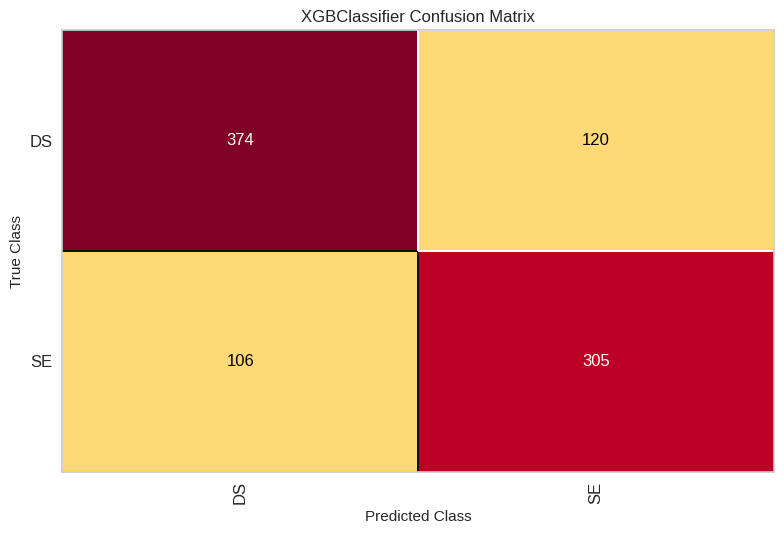

ConfusionMatrix(ax=<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['DS', 'SE'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7b7c11331610>,
                estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        earl...
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=None,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=None, ...))

In [15]:
yc.confusion_matrix(xgb_def, X_train, y_train, X_test, y_test, classes=['DS','SE'])

In [18]:
cm = skm.confusion_matrix(y_test, xgb_def.predict(X_test))

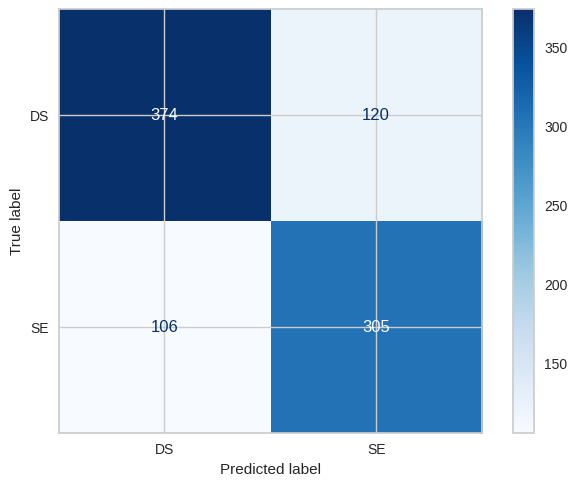

In [19]:
disp = skm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['DS','SE']) #just an array. not as good looking
disp.plot(cmap='Blues')

In [20]:
skm.precision_score(y_test, xgb_def.predict(X_test))

0.7176470588235294

In [22]:
skm.recall_score(y_test, xgb_def.predict(X_test))

0.7420924574209246

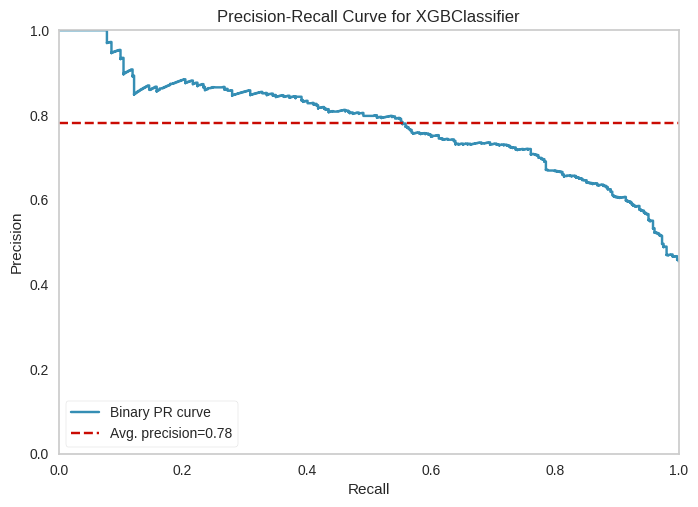

PrecisionRecallCurve(ax=<Axes: title={'center': 'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>,
                     estimator=XGBClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_typ...
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...),
                     iso_f1_values={0.2, 0.4, 0.6, 0.8}, micro=False,
                     per_class=True)

In [23]:
yc.precision_recall_curve(xgb_def, X_train, y_train, X_test, y_test, 
                          micro=False, macro=False, per_class=True)

In [24]:
skm.f1_score(y_test, xgb_def.predict(X_test))

0.7296650717703349

In [25]:
print(skm.classification_report(y_test, y_pred=xgb_def.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       494
           1       0.72      0.74      0.73       411

    accuracy                           0.75       905
   macro avg       0.75      0.75      0.75       905
weighted avg       0.75      0.75      0.75       905



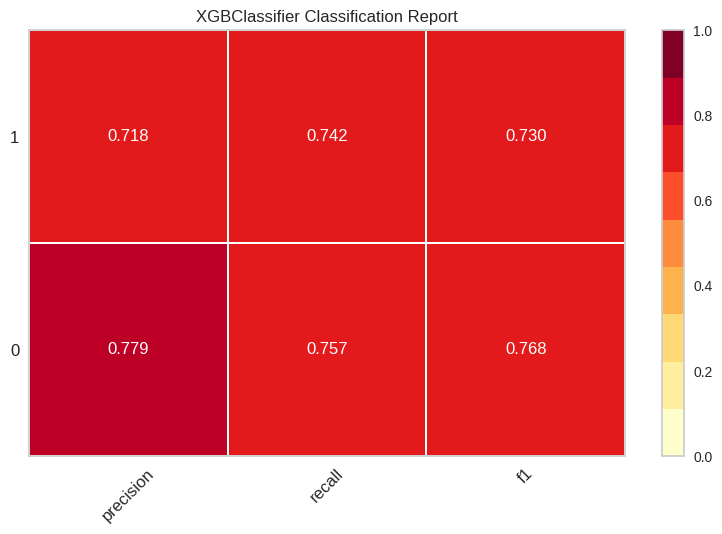

ClassificationReport(ax=<Axes: title={'center': 'XGBClassifier Classification Report'}>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7b7c112d5ed0>,
                     estimator=XGBClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_...
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...))

In [26]:
yc.classification_report(xgb_def, X_train, y_train, X_test, y_test, micro=False, macro=False)

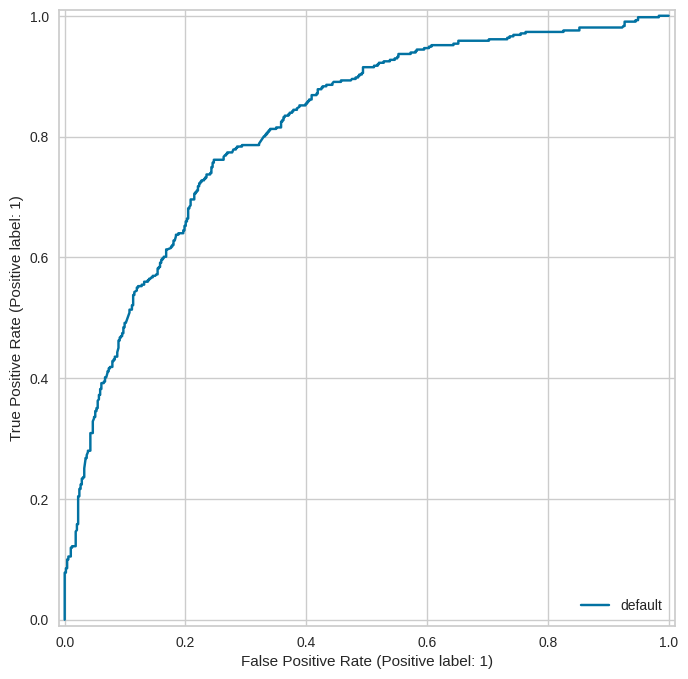

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
skm.RocCurveDisplay.from_estimator(xgb_def, X_test, y_test, ax=ax, label='default')
#skm.RocCurveDisplay.from_estimator(xg_step, X_test, y_test, ax=ax)

In [31]:
skm.f1_score(y_test, xgb_def.predict(X_test))

0.7296650717703349

In [32]:
skm.roc_auc_score(y_test, xgb_def.predict(X_test))

0.7495887388319198